<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset download link:
https://drive.google.com/file/d/1BAXAc3vAuraBQgyDf8YpCwtN6mPQGC2I/view?usp=sharing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Elbow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data, _ = make_blobs(n_samples=3000, n_features=2, centers=6, random_state=0)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='r')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### K-means

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [ ]:
data.shape
data.info()

(4000, 2)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

[12184626.129627967,
 1316420.8509477214,
 992634.0606702506,
 719601.1096991906,
 534812.0408006302,
 372841.75378276623,
 320185.8682971587,
 276876.20957565017,
 252722.34358893122,
 230812.44051235367]

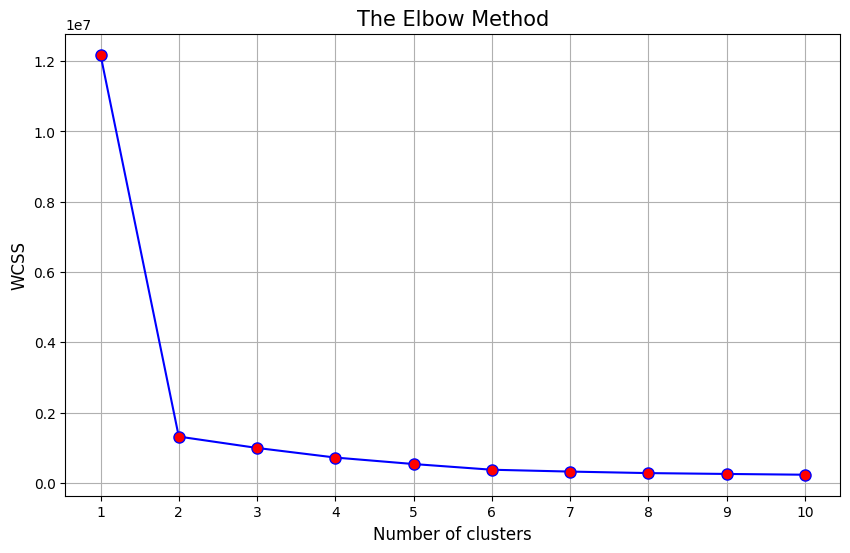

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='r')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
k=4
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [ ]:
kmeans.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

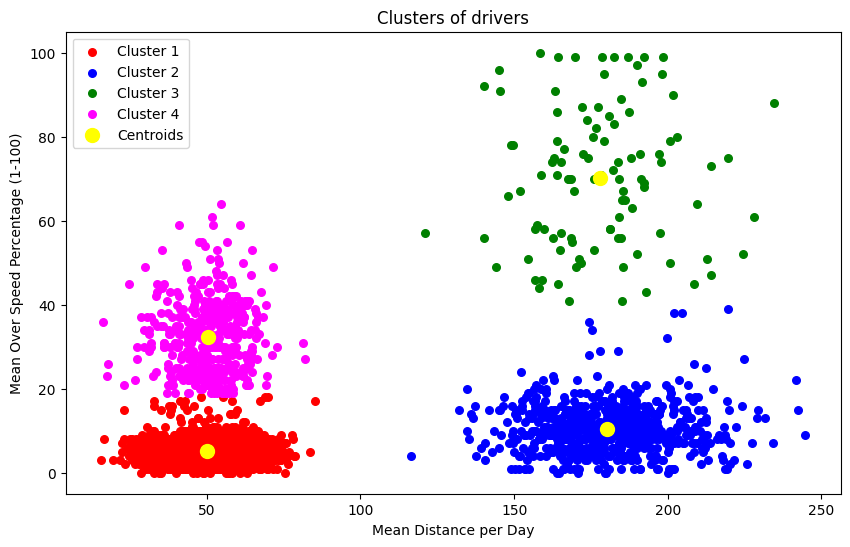

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'magenta', 'cyan', 'black', 'purple', 'orange', 'brown']
for i in range(k):
    plt.scatter(data.values[y_kmeans == i, 0], data.values[y_kmeans == i, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of drivers')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage (1-100)')
plt.legend()
plt.show()

In [ ]:
inertia = kmeans.inertia_                                                   # (0 ... inf)
print(f'Inertia: {inertia}')

Inertia: 719601.1096991906


In [ ]:
sil_score = silhouette_score(data, y_kmeans)                        # (-1 ... +1)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5907475009381601


In [ ]:
new_sample1 = np.array([[65,	80]])
pred_cluster1 = kmeans.predict(new_sample1)
print(f"new sample1 belongs to cluster: {pred_cluster1}")

new_sample2 = np.array([[165,	80]])
pred_cluster2 = kmeans.predict(new_sample2)
print(f"new sample2 belongs to cluster: {pred_cluster2}")

new_sample3 = np.array([[55,	18]])
pred_cluster3 = kmeans.predict(new_sample3)
print(f"new sample3 belongs to cluster: {pred_cluster3}")

new sample1 belongs to cluster: [3]
